In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
dataset = pd.read_csv('used_cars_dataset.csv')


In [3]:
dataset.head()


,name,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner,60000
1,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner,135000
2,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner,600000
3,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner,250000
4,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner,450000


In [4]:
numerical_features=['year','km_driven']
categorical_features=['name','fuel','seller_type','transmission','owner']

In [5]:
dataset=dataset[numerical_features + categorical_features+['selling_price']]

In [6]:
dataset

,year,km_driven,name,fuel,seller_type,transmission,owner,selling_price
0,2007,70000,Maruti 800 AC,Petrol,Individual,Manual,First Owner,60000
1,2007,50000,Maruti Wagon R LXI Minor,Petrol,Individual,Manual,First Owner,135000
2,2012,100000,Hyundai Verna 1.6 SX,Diesel,Individual,Manual,First Owner,600000
3,2017,46000,Datsun RediGO T Option,Petrol,Individual,Manual,First Owner,250000
4,2014,141000,Honda Amaze VX i-DTEC,Diesel,Individual,Manual,Second Owner,450000
...,...,...,...,...,...,...,...,...
4335,2014,80000,Hyundai i20 Magna 1.4 CRDi (Diesel),Diesel,Individual,Manual,Second Owner,409999
4336,2014,80000,Hyundai i20 Magna 1.4 CRDi,Diesel,Individual,Manual,Second Owner,409999
4337,2009,83000,Maruti 800 AC BSIII,Petrol,Individual,Manual,Second Owner,110000
4338,2016,90000,Hyundai Creta 1.6 CRDi SX Option,Diesel,Individual,Manual,First Owner,865000


In [7]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(drop='first',sparse=False)
categorical_encoded=encoder.fit_transform(dataset[categorical_features])
categorical_df=pd.DataFrame(categorical_encoded,columns=encoder.get_feature_names_out(categorical_features))
dataset=pd.concat([dataset[numerical_features] ,categorical_df,dataset['selling_price']],axis=1)

In [8]:
dataset

,year,km_driven,name_Ambassador Classic 2000 Dsz,name_Ambassador Grand 1800 ISZ MPFI PW CL,name_Audi A4 1.8 TFSI,name_Audi A4 2.0 TDI,name_Audi A4 2.0 TDI 177 Bhp Premium Plus,name_Audi A4 3.0 TDI Quattro,name_Audi A4 30 TFSI Technology,name_Audi A4 35 TDI Premium,...,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,selling_price
0,2007,70000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,60000
1,2007,50000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,135000
2,2012,100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,600000
3,2017,46000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,250000
4,2014,141000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,80000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,409999
4336,2014,80000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,409999
4337,2009,83000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,110000
4338,2016,90000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,865000


In [9]:
x = dataset.iloc[:, 0 :-1]
y = dataset.iloc[:, -1]
print(x)
print(y)


      year  km_driven  name_Ambassador Classic 2000 Dsz  \
0     2007      70000                               0.0   
1     2007      50000                               0.0   
2     2012     100000                               0.0   
3     2017      46000                               0.0   
4     2014     141000                               0.0   
...    ...        ...                               ...   
4335  2014      80000                               0.0   
4336  2014      80000                               0.0   
4337  2009      83000                               0.0   
4338  2016      90000                               0.0   
4339  2016      40000                               0.0   

      name_Ambassador Grand 1800 ISZ MPFI PW CL  name_Audi A4 1.8 TFSI  \
0                                           0.0                    0.0   
1                                           0.0                    0.0   
2                                           0.0                    0.

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print(x)
print(y)

      year  km_driven  name_Ambassador Classic 2000 Dsz  \
0     2007      70000                               0.0   
1     2007      50000                               0.0   
2     2012     100000                               0.0   
3     2017      46000                               0.0   
4     2014     141000                               0.0   
...    ...        ...                               ...   
4335  2014      80000                               0.0   
4336  2014      80000                               0.0   
4337  2009      83000                               0.0   
4338  2016      90000                               0.0   
4339  2016      40000                               0.0   

      name_Ambassador Grand 1800 ISZ MPFI PW CL  name_Audi A4 1.8 TFSI  \
0                                           0.0                    0.0   
1                                           0.0                    0.0   
2                                           0.0                    0.

In [11]:
from sklearn.preprocessing import StandardScaler
numerical_data=dataset[numerical_features]
scaler=StandardScaler().fit(numerical_data)
normalized_numerical_data=scaler.transform(numerical_data)

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)


LinearRegression()

In [13]:
print("Coefficients:",regressor.coef_," Constant:",regressor.intercept_)


Coefficients: [ 2.70624354e+04 -5.48466597e-01  3.54038714e+04 ... -1.97357455e+04
  9.84179041e+04 -2.98230998e+04]  Constant: 16490689653.53879


In [14]:
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

       Actual     Predicted
2089   465000  5.207943e+05
1077  1580000  1.580000e+06
1495   150000  6.365061e+04
555   4950000  4.950000e+06
2615   125000  1.250000e+05
...       ...           ...
1359   125000  1.513329e+05
4197   300000  2.730681e+05
1818   210000  1.373669e+05
2644    60000  4.223934e+04
917   3800000  3.800000e+06

[868 rows x 2 columns]


In [15]:

from sklearn import metrics 
print('Mean absolute error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean squared error:', metrics.mean_squared_error(y_test, y_pred))
      


Mean absolute error: 9029460780.475426
Mean squared error: 2.951184329419932e+21


In [16]:
df.head()

,Actual,Predicted
2089,465000,5.207943e+05
1077,1580000,1.580000e+06
1495,150000,6.365061e+04
555,4950000,4.950000e+06
2615,125000,1.250000e+05


In [17]:
from sklearn.preprocessing import StandardScaler
numerical_data=dataset[numerical_features]
scaler=StandardScaler().fit(numerical_data)
normalized_numerical_data=scaler.transform(numerical_data)

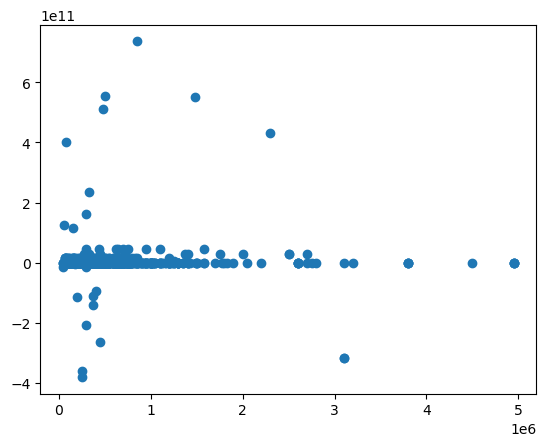

In [18]:
plt.scatter(y_test,y_pred)

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error , r2_score
mae = mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print("Mean Absolute error (MAE):",mae)
print("Mean Squared error (MSE):",mse)
print("Root Mean Squared Error (RMSE):",rmse)
print("R2 Score:",r2)

Mean Absolute error (MAE): 9029460780.475426
Mean Squared error (MSE): 2.951184329419932e+21
Root Mean Squared Error (RMSE): 54324803997.9891
R2 Score: -7947151664.868617
